<a href="https://colab.research.google.com/github/mkayanda/deep-_learning/blob/main/02_Data_representation_for_nueral_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Building an intuition into mathematical concepts (i.e. tensors, tensor operations, differentiation, gradient descent, etc) is key to working with deep learning. 

  In general all current machine learning sysyesm use tensors as their basic data structure. A tensor is a container of data - usually numeric data. 

  1. **Scalars** (rank-0 tensor) are a tensor that contains only one number. 
    
    In numpy which a float32 or float64 number is a scalar tensor. Generally you can display the number of axes of a numpy tensor via the ndim attribute. For a scalar it will have 0 axes, that is, ndim == 0.

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

  2. **Vectors** (rank-1 tensors) is an array of numbers.It has 1 axis. 

In [3]:
x = np.array([34, 565, 65, 67])
print(x)
print('\n')
print(f'The number of axis is {x.ndim}')

[ 34 565  65  67]


The number of axis is 1


Vector *x* here would be refered to as 4-dimensional because it has four entries. Dimensionality denotes either the number of entries along a specific axis (in our case 4D vector) or the number of axes in a tensor (such as a 5D tensor). **This can be confusing at times.**

  3. **Matrices**  (rank-2 tensors) is an array of vectors. It has two axes i.e. rows and colums. 

Visually it looks like a rectangular grid of numbers.

In [4]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x.ndim

2

  4. **Rank-3 and higher-rank tensors**
You can pack matrices in a new array and obtain higher ranking tensors. 

In [5]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim 

3

*What are the key attributes of a tensor?*

    1. Number of axes(rank) - rank-3 tensor has three axes, matrix has two axes. 
    2. Shape - a tuple of integers describing how many dimensions the tensor has along each axis. for example the matrix above has a shape of (3, 5) and the rank-3 tensor above has a shape of (3,3,5) while a vector has a single element such as (4, ) above. 
    3. Data type - type of data contained in a tensor. 

In [6]:
#checking with an example 

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# display number of axes for train_images

train_images.ndim

3

In [8]:
# display the shape
train_images.shape

(60000, 28, 28)

In [9]:
#display datatype
train_images.dtype

dtype('uint8')

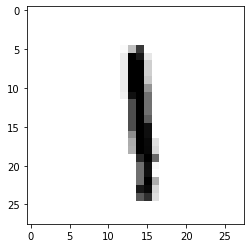

In [10]:
# display the 8th digit
import matplotlib.pyplot as plt
digit = train_images[8]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [11]:
#checking against corresponing label
train_labels[8]

1

You may choose to manipulate tensors using numpy's slicing operations. For example:-

In [12]:
#this selects digits #10 to 100 (100 not included) and put them in an array of the resulting shape
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [13]:
# you may select between any two indicies along each tensor axis
my_slice = train_images[:, 14:, 14:]
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [14]:
# you also use negative indices
my_slice = train_images[:, 7: -7, 7: -7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

####Data Batches
Deep learning models dont process an entire dataset at once but instead data is broken into small batches. Should note that in all data tensors in deep learning the first axis will be the samples axis.

In [16]:
batch = train_images[: 128]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
# next batch will be
batch = train_images[128:256]

# and the nth batch will be 
n = 3
batch = train_images[128 * n: 128 * (n+1)]

When considering such a batch tensor, axis 0 (first axis) is refered to as the batch axis or batch dimension.

### A summary of real-world examples of data tensors. 

    1. Vector - where each sample is a vector of numerical attributes or features. rank2 tensors of shape (samples, features)
    2. Time series data or sequence data - where each sample is a sequence of length timesteps of feature vectors. i.e. rank-3 tensor of shape (samples, timesteps, features).
    3. Images - where each sample is a 2D grid of pixels, with each pixel represented by a vector of values ("Channels") i'e. rank-4 of tensors of shape (samples, height, width, channels).
    4. Videos - where each sample is a sequence of length frames of images. i.e. tensors of shape (samples, frames, heights, width, channels).

